In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import time     # this library provides various time related functions like current time, date etc.

In [ ]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the initial data for different states
data_TX=pd.read_csv("/content/drive/My Drive/AI_Thermal sytems_course_project/Texas_copy/Data_Texas_copy.csv")#Texas
data_NY=pd.read_csv("/content/drive/My Drive/AI_Thermal sytems_course_project/NewYork_copy/Data_NewYork_copy.csv")#New York
data_NJ=pd.read_csv("/content/drive/My Drive/AI_Thermal sytems_course_project/NewJersey_copy/Data_NewJersey_copy.csv")#New Jersey
data_AZ=pd.read_csv("/content/drive/My Drive/AI_Thermal sytems_course_project/Arizona_copy/Data_Arizona_copy.csv")#Arizona
data_CA=pd.read_csv("/content/drive/My Drive/AI_Thermal sytems_course_project/California/Data_California_copy.csv")#California
data_WA=pd.read_csv("/content/drive/My Drive/AI_Thermal sytems_course_project/Washington/Data_Washington_copy.csv")#Washington
data_OR=pd.read_csv("/content/drive/My Drive/AI_Thermal sytems_course_project/Oregon/Data_Oregon_copy.csv")#Oregon
dc=[data_WA, data_OR, data_CA, data_NY, data_TX, data_NJ, data_AZ]
data_tot=pd.concat(dc,ignore_index=True)# Merge datas of different states
#data_tot.sort_values('County',inplace=True)# Sort alphabetically
data_tot.reset_index(inplace=True,drop=True)# reset the indexing
from pandas.api.types import CategoricalDtype # import module required to make a categorical data
status_type = CategoricalDtype(categories=['increase', 'decrease','no change'], ordered=True) #define your items as categories
data_tot['status of the change'] = data_tot['status of the change'].astype(status_type)
#data_tot.drop(columns=['Population density (person/km^2)','Area (sq mile)','1_months_before_order deaths/cases percentage' ,'1_months_after_order deaths/cases percentage','BIDEN PCT','TRUMP PCT'],inplace=True)
#data_tot.head(5)
data_tot_copy = data_tot.copy(deep=True)

In [ ]:
data_tot.dtypes

County                                             object
Population                                        float64
Area (sq km)                                      float64
Population density (person/km^2)                  float64
High school percentage                            float64
Persons per household                             float64
Persons in poverty percentage                     float64
Median income                                     float64
Biden won                                           int64
Trump won                                           int64
Never                                             float64
Rarely                                            float64
Sometimes                                         float64
Frequently                                        float64
Always                                            float64
1_months_before_order deaths/cases percentage     float64
1_months_after_order deaths/cases percentage      float64
change in deat

In [ ]:
#data_tot.replace([np.inf, -np.inf], np.nan,inplace=True)
#data_tot.dropna(inplace=True)
data_tot.describe()

,Population,Area (sq km),Population density (person/km^2),High school percentage,Persons per household,Persons in poverty percentage,Median income,Biden won,Trump won,Never,Rarely,Sometimes,Frequently,Always,1_months_before_order deaths/cases percentage,1_months_after_order deaths/cases percentage,change in deaths/cases percentage
count,4.820000e+02,482.000000,482.000000,130.000000,130.000000,130.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,2.393159e+05,4003.157055,258.506103,87.054615,2.608308,12.916923,57583.543568,0.240664,0.759336,0.042355,0.047237,0.081956,0.175349,0.653041,3.157554,2.027522,-1.130032
std,6.877412e+05,5299.713278,1634.865557,6.576740,0.363344,3.619438,15987.010591,0.427931,0.427931,0.038863,0.036948,0.045010,0.063253,0.119877,12.719009,3.982697,12.790785
min,1.690000e+02,59.129472,0.096956,66.900000,2.030000,6.100000,25098.000000,0.000000,0.000000,0.000000,0.000000,0.004000,0.029000,0.284000,0.000000,0.000000,-203.699274
25%,1.241950e+04,1912.714090,3.981792,84.575000,2.342500,10.600000,47750.750000,0.000000,1.000000,0.016000,0.018000,0.051000,0.132250,0.570000,0.000000,0.000000,-0.287252
50%,4.563100e+04,2390.560770,15.619136,89.250000,2.515000,12.650000,53936.000000,0.000000,1.000000,0.030000,0.039000,0.072000,0.172500,0.666500,0.000000,0.989326,0.000000
75%,1.520868e+05,3748.298278,56.376438,91.475000,2.810000,15.175000,63311.000000,0.000000,1.000000,0.058000,0.066000,0.105000,0.213000,0.749000,1.529964,2.340189,1.407683
max,1.003911e+07,51947.274030,27544.741280,95.900000,3.870000,26.300000,124055.000000,1.000000,1.000000,0.239000,0.206000,0.259000,0.370000,0.889000,209.009009,50.000000,50.000000


In [ ]:
#Drop the rows with no change in their status of the change

#data_tot.replace('no change', np.nan,inplace=True)
#data_tot.dropna(inplace=True)
data_tot.drop(data_tot.loc[data_tot['status of the change']=='no change'].index, inplace=True)
data_tot.head(5)
#data_tot.shape

,County,Population,Area (sq km),Population density (person/km^2),High school percentage,Persons per household,Persons in poverty percentage,Median income,Biden won,Trump won,Never,Rarely,Sometimes,Frequently,Always,1_months_before_order deaths/cases percentage,1_months_after_order deaths/cases percentage,change in deaths/cases percentage,status of the change
0,Adams County,19983.0,4985.73075,4.008038,66.9,3.26,16.8,48294.0,0,1,0.077,0.051,0.072,0.076,0.724,0.000000,0.431034,0.431034,increase
2,Benton County,204390.0,4402.98300,46.420802,90.2,2.71,10.6,69023.0,0,1,0.084,0.011,0.064,0.080,0.761,1.877934,1.837769,-0.040165,decrease
3,Chelan County,77200.0,7562.77080,10.207899,82.6,2.66,12.2,58795.0,0,1,0.062,0.048,0.029,0.297,0.564,0.000000,0.335570,0.335570,increase
5,Clark County,488241.0,1629.10371,299.699152,92.7,2.69,9.2,75253.0,1,0,0.020,0.021,0.048,0.170,0.741,2.602230,0.627943,-1.974287,decrease
7,Cowlitz County,110593.0,2949.99861,37.489170,89.3,2.51,12.6,54506.0,0,1,0.041,0.020,0.098,0.216,0.625,0.000000,1.293103,1.293103,increase


In [ ]:
#Drop the row containing a death rate greater than 100%
data_tot.drop(data_tot.loc[data_tot["1_months_before_order deaths/cases percentage"] > 100].index, inplace=True)
data_tot.describe()

,Population,Area (sq km),Population density (person/km^2),High school percentage,Persons per household,Persons in poverty percentage,Median income,Biden won,Trump won,Never,Rarely,Sometimes,Frequently,Always,1_months_before_order deaths/cases percentage,1_months_after_order deaths/cases percentage,change in deaths/cases percentage
count,3.410000e+02,341.000000,341.000000,77.000000,77.000000,77.000000,341.000000,341.00000,341.00000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,3.220127e+05,4181.397507,349.400508,85.327273,2.749610,12.550649,59117.712610,0.28739,0.71261,0.037877,0.042669,0.076150,0.170525,0.672733,3.850241,2.850310,-0.999931
std,8.012375e+05,5897.653890,1932.745985,7.267169,0.333677,3.712661,17180.638411,0.45321,0.45321,0.032937,0.033948,0.041027,0.062003,0.110114,9.982137,4.476219,10.498566
min,4.040000e+02,59.129472,0.107059,66.900000,2.150000,6.100000,27161.000000,0.00000,0.00000,0.000000,0.000000,0.004000,0.029000,0.305000,0.000000,0.000000,-89.552239
25%,2.129000e+04,1844.072880,8.022162,80.900000,2.470000,9.500000,48365.000000,0.00000,0.00000,0.016000,0.017000,0.048000,0.129000,0.596000,0.000000,0.900901,-1.378367
50%,6.823800e+04,2390.560770,24.877226,88.100000,2.690000,12.600000,54506.000000,0.00000,1.00000,0.027000,0.034000,0.068000,0.164000,0.692000,0.595238,1.607963,0.609756
75%,2.588260e+05,3603.504887,104.209267,91.100000,2.970000,14.000000,66206.000000,1.00000,1.00000,0.054000,0.063000,0.096000,0.206000,0.757000,2.857143,3.324808,2.173913
max,1.003911e+07,51947.274030,27544.741280,95.900000,3.870000,22.000000,124055.000000,1.00000,1.00000,0.182000,0.206000,0.259000,0.369000,0.880000,89.552239,50.000000,50.000000


In [ ]:
#initial assessment of data by scatter plotting
print(data_tot_copy['status of the change'].value_counts())
#s1='Population'
#s2='Median household income (in 2018 dollars)'
#plt.scatter(data_tot[s1],data_tot[s2],c=data_tot['status of the change'].cat.codes) 
d_stat = dict(enumerate(data_tot['status of the change'].cat.categories))
print (d_stat)
#plt.xlabel(s1)
#plt.ylabel(s2)

increase     209
no change    140
decrease     133
Name: status of the change, dtype: int64
{0: 'increase', 1: 'decrease', 2: 'no change'}


In [ ]:
#x=data_tot[['Population density (person/km^2)','percentage_of_the_population_completing_college']]#define your input data
#x=data_tot.drop(columns=['1_months_before_order deaths/cases percentage', '1_months_after_order deaths/cases percentage', 'change in deaths/cases percentage', 'status of the change','County'])
x=data_tot.drop(columns=['1_months_before_order deaths/cases percentage', '1_months_after_order deaths/cases percentage', 'change in deaths/cases percentage', 'Area (sq km)', 'Population density (person/km^2)', 'status of the change','County', "Persons in poverty percentage", 'High school percentage', 'Persons per household'])
#x=data_tot.drop(columns=['1_months_before_order deaths/cases percentage', '1_months_after_order deaths/cases percentage', 'change in deaths/cases percentage', 'status of the change', 'percentage_of_the_population_completing_college', 'Per capita income in past 12 months (in 2018 dollars)', 'County', 'Area (sq mile)'])
y1=data_tot[['change in deaths/cases percentage']]#define your output data one
y2=data_tot['status of the change'].cat.codes

In [ ]:
x.dtypes

Population       float64
Median income    float64
Biden won          int64
Trump won          int64
Never            float64
Rarely           float64
Sometimes        float64
Frequently       float64
Always           float64
dtype: object

In [ ]:
#scaling data
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
max_abs_scaler = MaxAbsScaler()
x_scaled=min_max_scaler.fit_transform(x) #scale the positive values
y1_scaled=max_abs_scaler.fit_transform(y1)# scale the values that are both positive and negative
input_cluster=np.append(x_scaled, y1_scaled, axis=1)

In [ ]:
#creating data from scaled files 
#del data_class
#del data_t
data_class = pd.concat([pd.DataFrame(x_scaled), pd.DataFrame(y2)], axis=1)
#data_class.columns=['Population','Area (sq km)', 'Population density (person/km^2)', 'High school percentage','Persons per household', 'Persons in poverty percentage', 'Median income','Biden won', 'Trump won', 'Never', 'Rarely', 'Sometimes', 'Frequently', 'Always', 'status of the change']
data_class.columns=['Population', 'Median income','Biden won', 'Trump won', 'Never', 'Rarely', 'Sometimes', 'Frequently', 'Always', 'status of the change']
data_t = pd.concat([pd.DataFrame(x_scaled), pd.DataFrame(y1_scaled)], axis=1)
#data_t.columns=['Population','Area (sq km)', 'Population density (person/km^2)', 'High school percentage','Persons per household', 'Persons in poverty percentage', 'Median income','Biden won', 'Trump won', 'Never', 'Rarely', 'Sometimes', 'Frequently', 'Always', 'change in deaths/cases percentage ']
data_t.columns=['Population', 'Median income','Democrat', 'Republican', 'Never', 'Rarely', 'Sometimes', 'Frequently', 'Always', '\u0394DR']
#data_class.head(5)
#print ('Delta: \u0394')

# **Classification Models**

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split 
#X_train,X_test,y_train,y_test = train_test_split(x_scaled,y2,test_size=1/5,random_state=27, shuffle=True)
X_train,X_test,y_train,y_test = x_scaled[0:77, :], x_scaled[77:, :], y2[0:77], y2[77:]

#create an instance of GaussianNB class
model=GaussianNB()
#model=MultinomialNB()

#fit the training data 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_hat = model.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d"  % (X_test.shape[0], (y_test != y_pred).sum()))

# you get the conditional probabilities

Number of mislabeled points out of a total 264 points : 64


In [ ]:
#compute our score to evaluate the performance of the fitting
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train, y_hat) 
print(score)
score = accuracy_score(y_test, y_pred) 
print(score)

0.7532467532467533
0.7575757575757576


              precision    recall  f1-score   support

           0       0.77      0.92      0.84       179
           1       0.71      0.41      0.52        85

    accuracy                           0.76       264
   macro avg       0.74      0.67      0.68       264
weighted avg       0.75      0.76      0.74       264



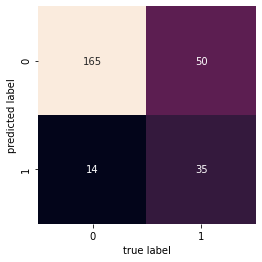

In [ ]:
#build a confusion matrix to visualize the performance of the model using seaborn
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_tuned = RandomForestClassifier(random_state = 27, max_depth = 7, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 10)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
print ('test accuracy:', accuracy_score(y_test, y_pred))
print("Number of mislabeled points out of a total %d points : %d"  % (X_test.shape[0], (y_test != y_pred).sum()))
y_hat = rf_tuned.predict(X_train)
#compute our score to evaluate the performance of the fitting
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) 
print('score_test=',score)
score = accuracy_score(y_train, y_hat) 
print('score_train=',score)

test accuracy: 0.678030303030303
Number of mislabeled points out of a total 264 points : 85
score_test= 0.678030303030303
score_train= 0.987012987012987


              precision    recall  f1-score   support

           0       0.76      0.76      0.76       179
           1       0.50      0.51      0.50        85

    accuracy                           0.68       264
   macro avg       0.63      0.63      0.63       264
weighted avg       0.68      0.68      0.68       264



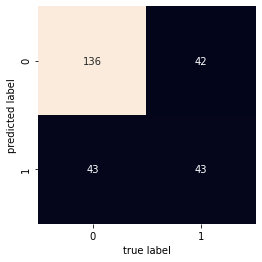

In [ ]:
#build a confusion matrix to visualize the performance of the model using seaborn
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

**XGBoost**

In [ ]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

test accuracy: 0.6856060606060606
Number of mislabeled points out of a total 264 points : 83
train accuracy: 0.974025974025974


Text(0, 0.5, 'frequency')

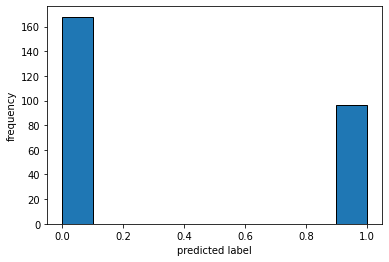

In [ ]:
xgb_tuned = xgb.XGBClassifier(colsample_bytree = 0.9605144176486423, gamma = 0.47356574160767617, learning_rate = 0.09754705301483349, max_depth = 4, n_estimators = 119, subsample= 0.623203357856742, random_state=27)
xgb_tuned.fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
print ('test accuracy:', accuracy_score(y_test, y_pred))
print("Number of mislabeled points out of a total %d points : %d"  % (X_test.shape[0], (y_test != y_pred).sum()))
y_hat = xgb_tuned.predict(X_train)
print ('train accuracy:', accuracy_score(y_train, y_hat))
plt.hist(y_pred,edgecolor="black")
plt.xlabel("predicted label")
plt.ylabel('frequency')

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       179
           1       0.51      0.58      0.54        85

    accuracy                           0.69       264
   macro avg       0.65      0.66      0.65       264
weighted avg       0.70      0.69      0.69       264



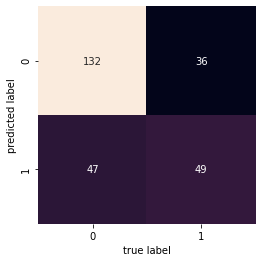

In [ ]:
#build a confusion matrix to visualize the performance of the model using seaborn
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');